# Import & Setup

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load Data

In [246]:
data = pd.read_csv("housing.csv")
print(data.info())
data.dropna(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  flo

# Train & Test Data

In [247]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
Data_train = x_train.join(y_train)
print(Data_train)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0       4412.0           924.0   
2057     -119.63     36.64                33.0       1036.0           181.0   
6453     -118.06     34.12                25.0       3891.0           848.0   
4619     -118.31     34.07                28.0       2362.0           949.0   
15266    -117.27     33.04                27.0       1839.0           392.0   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0       2991.0           500.0   
12081    -117.54     33.76                 5.0       5846.0          1035.0   
5447     -118.42     34.01                42.0       1594.0           369.0   
866      -122.04     37.57                12.0       5719.0          1064.0   
15948    -122.43     37.73                52.0       3602.0           738.0   

       population  households  median_income ocean_

# Exploratory Data Analysis (EDA)

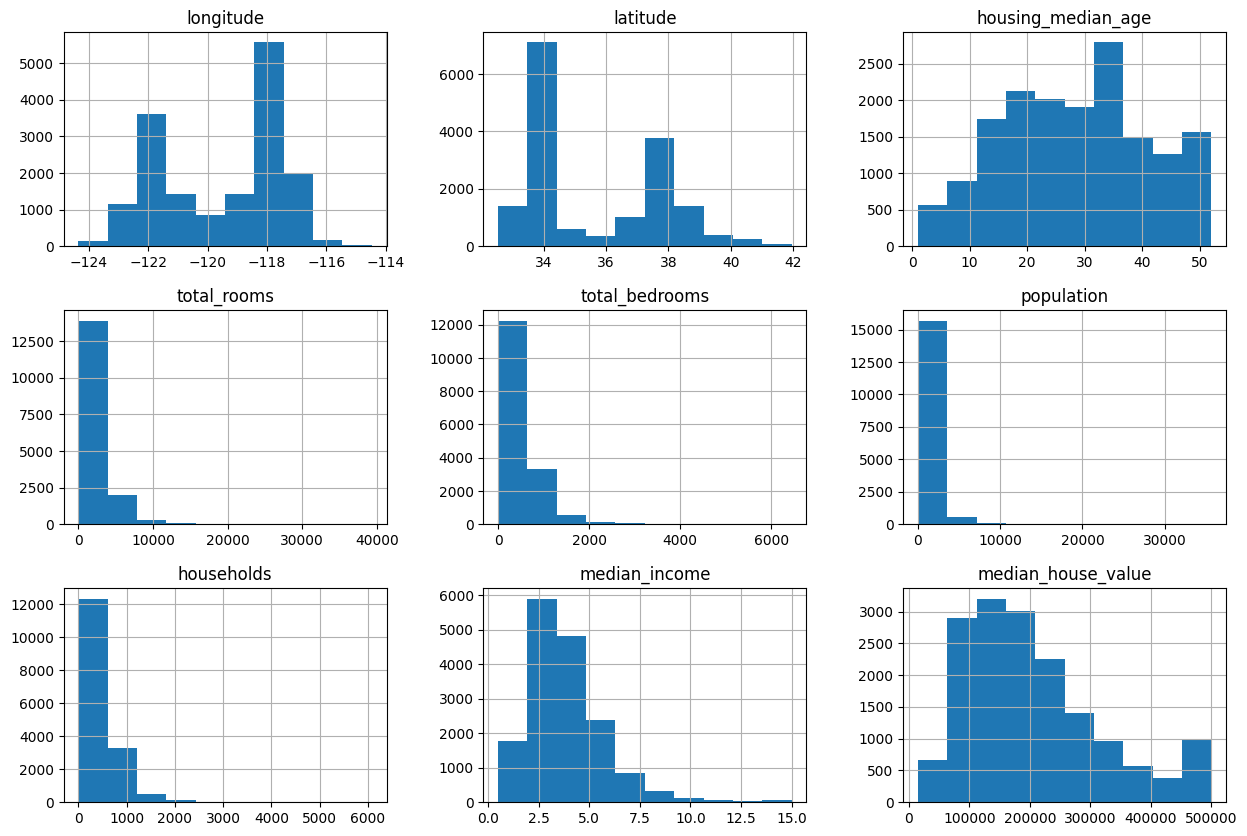

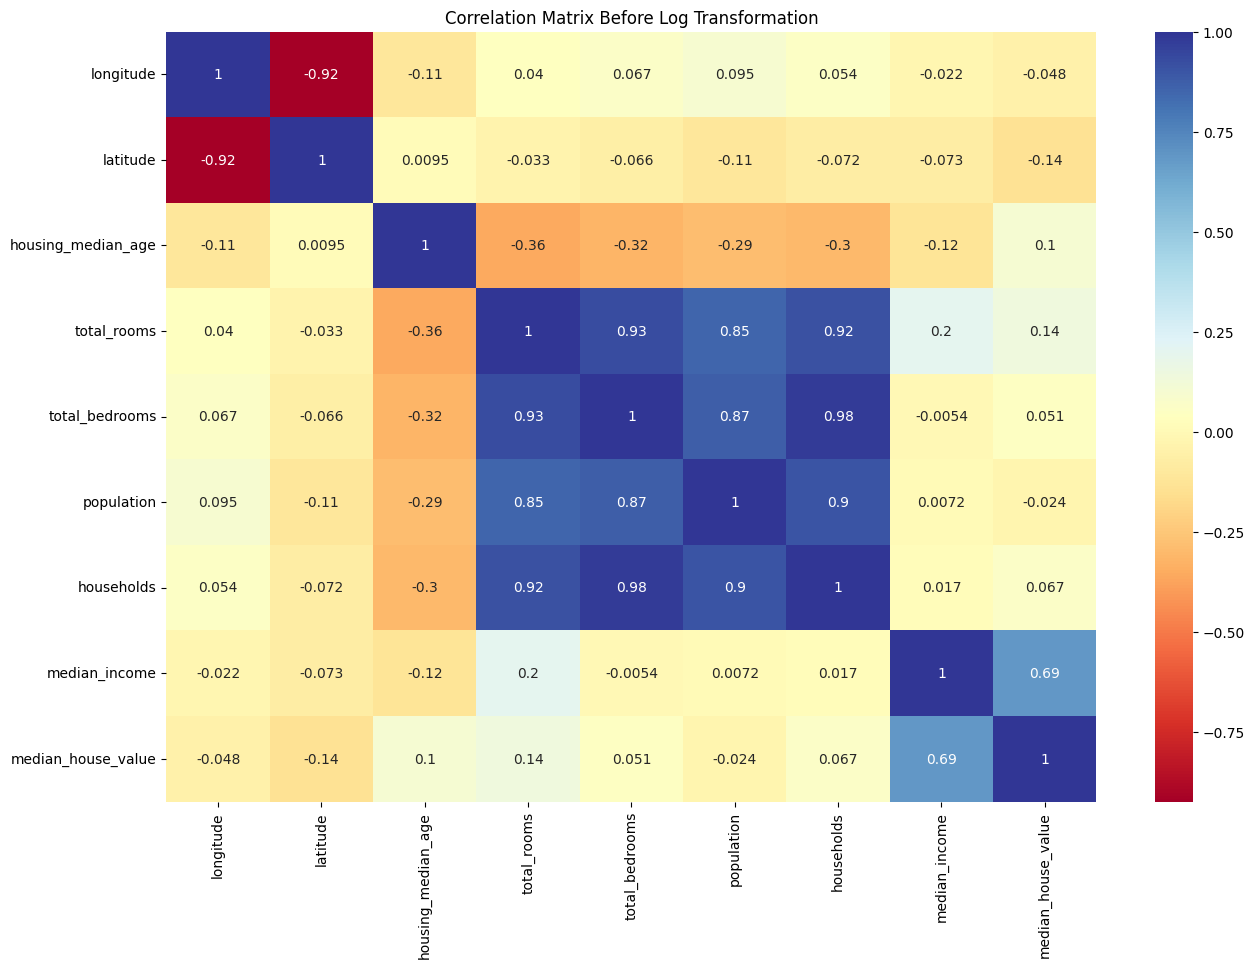

In [248]:
Data_train.hist(figsize= (15 , 10))
plt.show()

num_train = Data_train.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(num_train.corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation Matrix Before Log Transformation")
plt.show()

# Log Transformation

In [249]:
Data_train['total_rooms'] =  np.log(Data_train['total_rooms'] + 1)
Data_train['total_bedrooms'] =  np.log(Data_train['total_bedrooms'] + 1)
Data_train['median_income'] =  np.log(Data_train['median_income'] + 1)
Data_train['population'] =  np.log(Data_train['population'] + 1)

# Histograms after Log Transformation

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

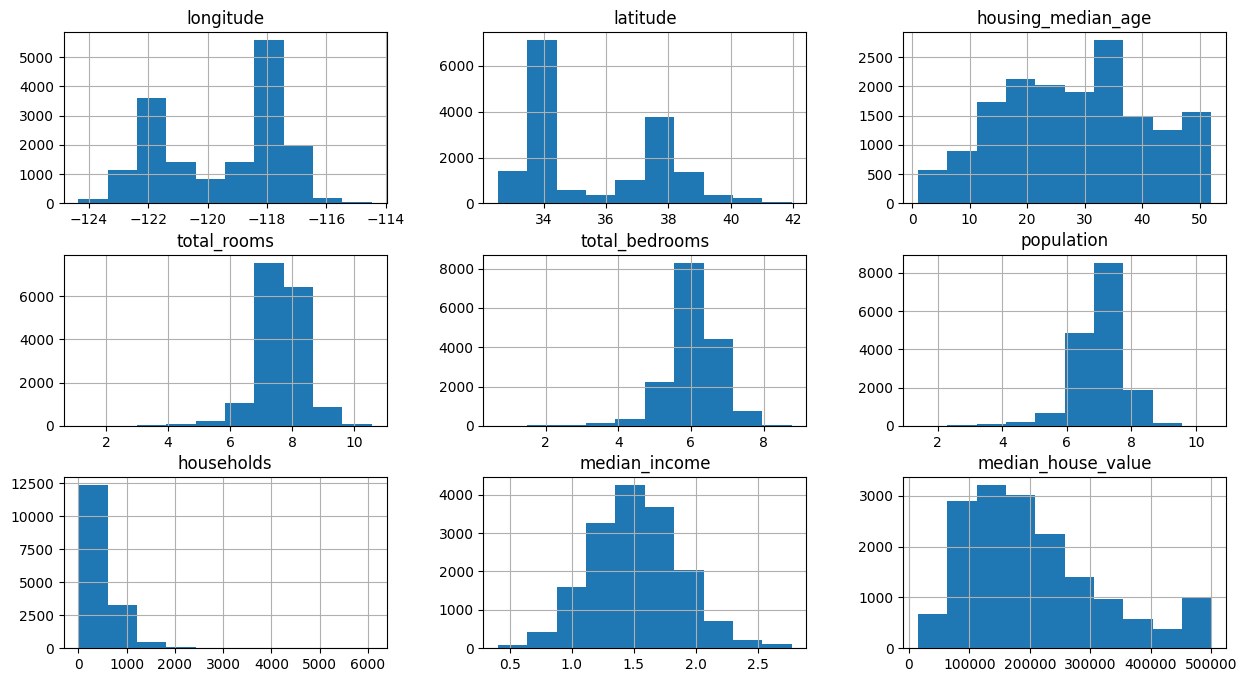

In [250]:
Data_train.hist(figsize=(15,8))

# Pair Plot

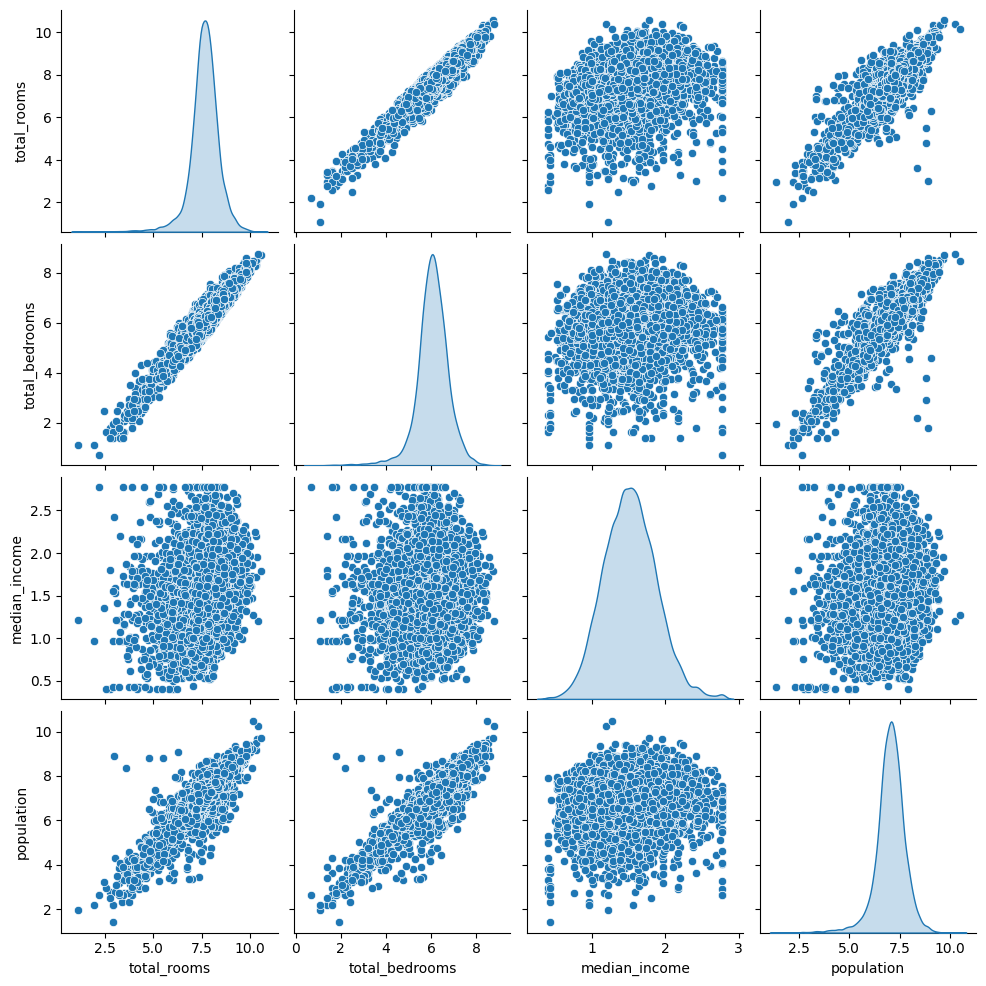

In [251]:
sns.pairplot(Data_train[['total_rooms','total_bedrooms','median_income','population']], diag_kind='kde')
plt.show()


# BoxPlot

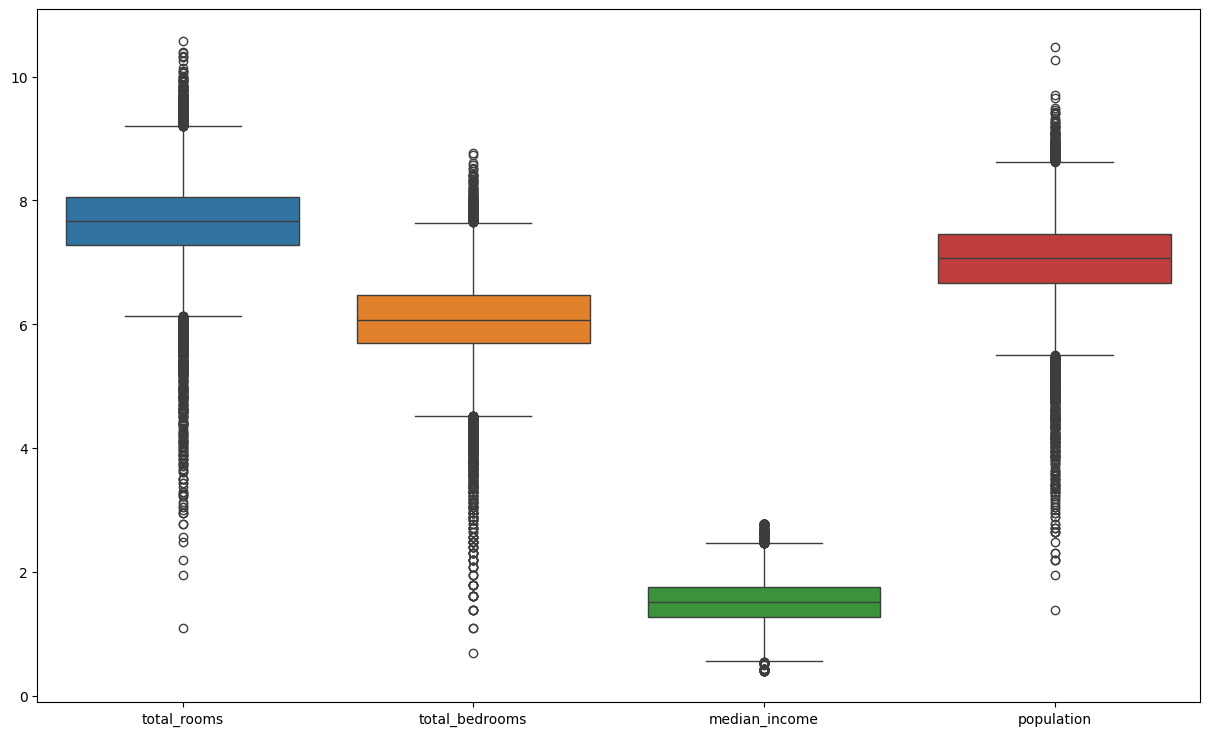

In [252]:
plt.figure(figsize=(15,9))
sns.boxplot(data=Data_train[['total_rooms','total_bedrooms','median_income','population']])
plt.show()

# Skewness & Kurtosis

In [253]:
# 8️⃣ Skewness & Kurtosis
# ===============================
print("Skewness:\n", Data_train[['total_rooms','total_bedrooms','median_income','population']].skew())
print("\nKurtosis:\n", Data_train[['total_rooms','total_bedrooms','median_income','population']].kurt())

Skewness:
 total_rooms      -1.105007
total_bedrooms   -1.006735
median_income     0.226398
population       -1.054395
dtype: float64

Kurtosis:
 total_rooms       5.254045
total_bedrooms    4.675000
median_income     0.244053
population        4.565862
dtype: float64


# Advanced Visualizations

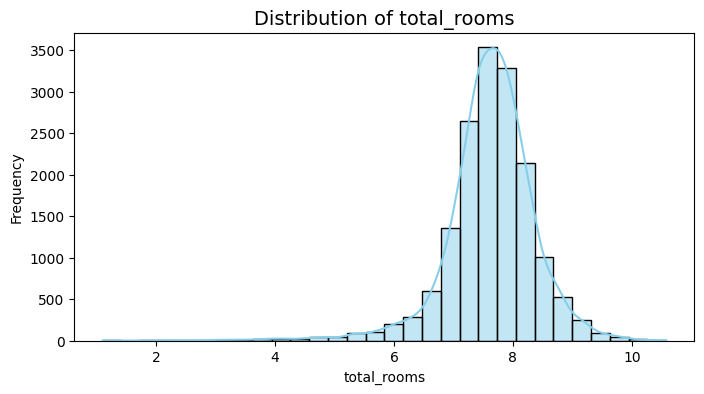

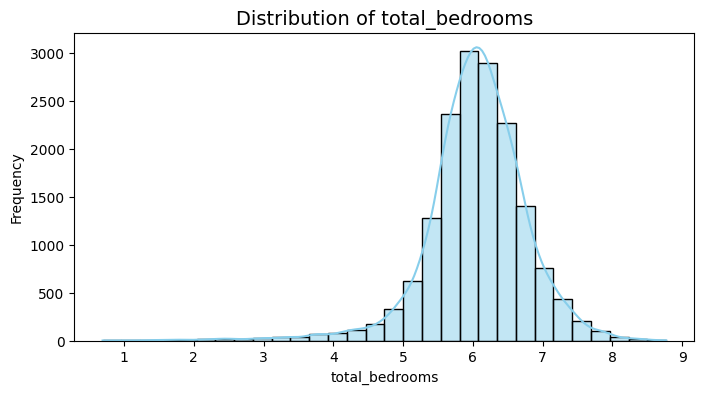

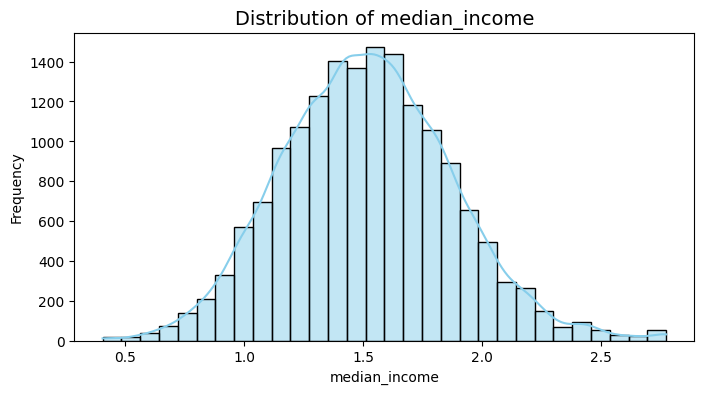

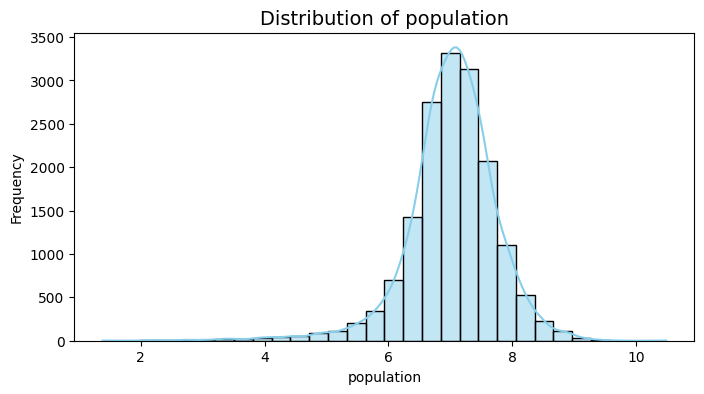

In [254]:
# Histogram + KDE
for col in ['total_rooms','total_bedrooms','median_income','population']:
    plt.figure(figsize=(8,4))
    sns.histplot(Data_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Pairplot with corner


c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\e\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, 

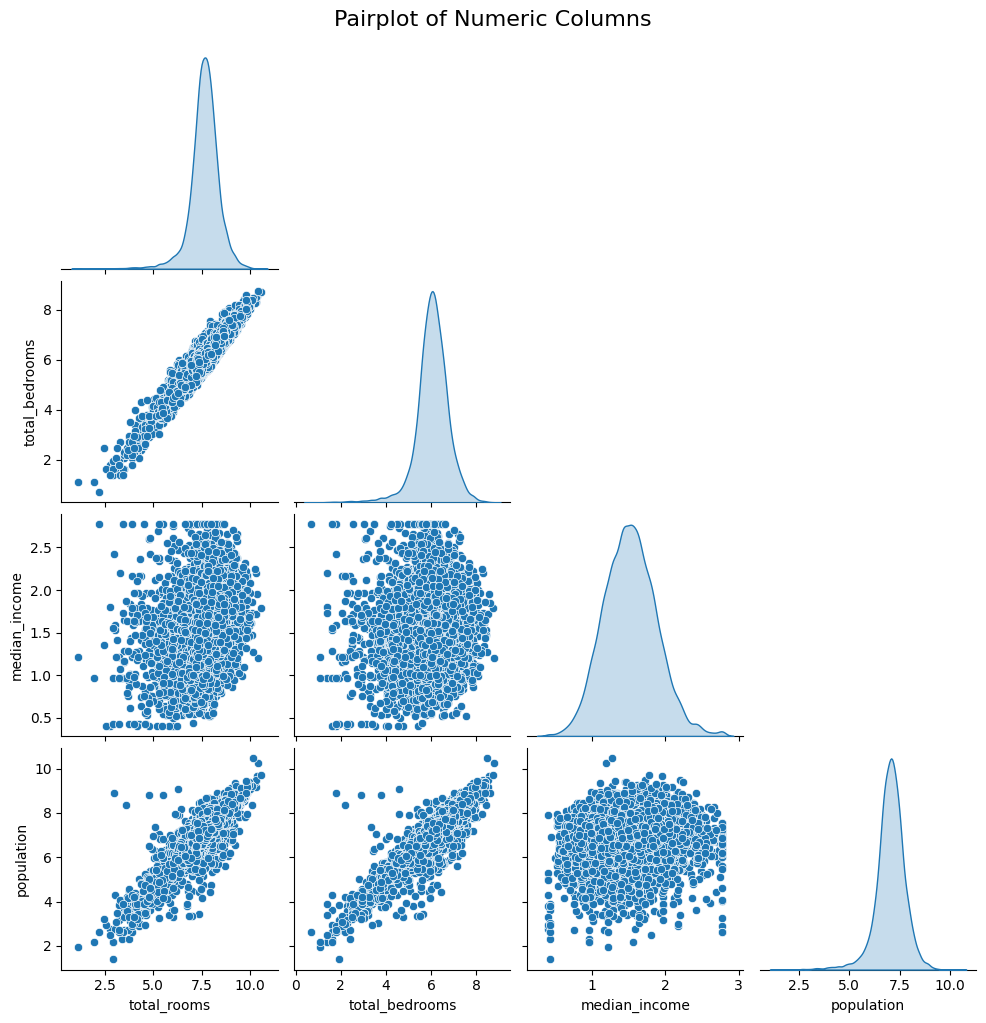

In [255]:
# Pairplot with corner=True
sns.pairplot(Data_train[['total_rooms','total_bedrooms','median_income','population']],
             corner=True, diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Numeric Columns', y=1.02, fontsize=16)
plt.show()

# Heatmap

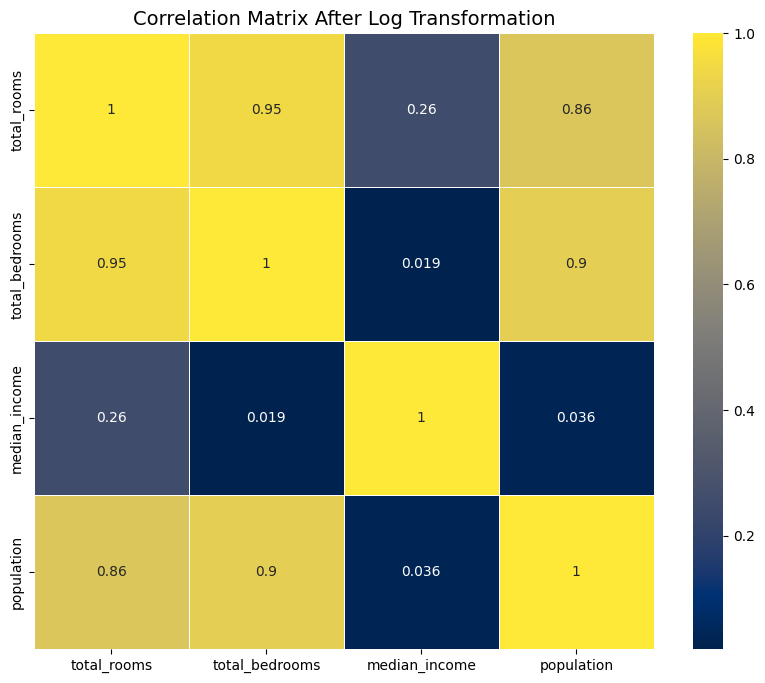

In [256]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Data_train[['total_rooms','total_bedrooms','median_income','population']].corr(),
            annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix After Log Transformation', fontsize=14)
plt.show()

In [ ]:
#OneHotEncoding 
Data_train=Data_train.join(pd.get_dummies(Data_train.ocean_proximity)).drop(['ocean_proximity'],axis=1)

# Correlation Matrix Before Log Transformation

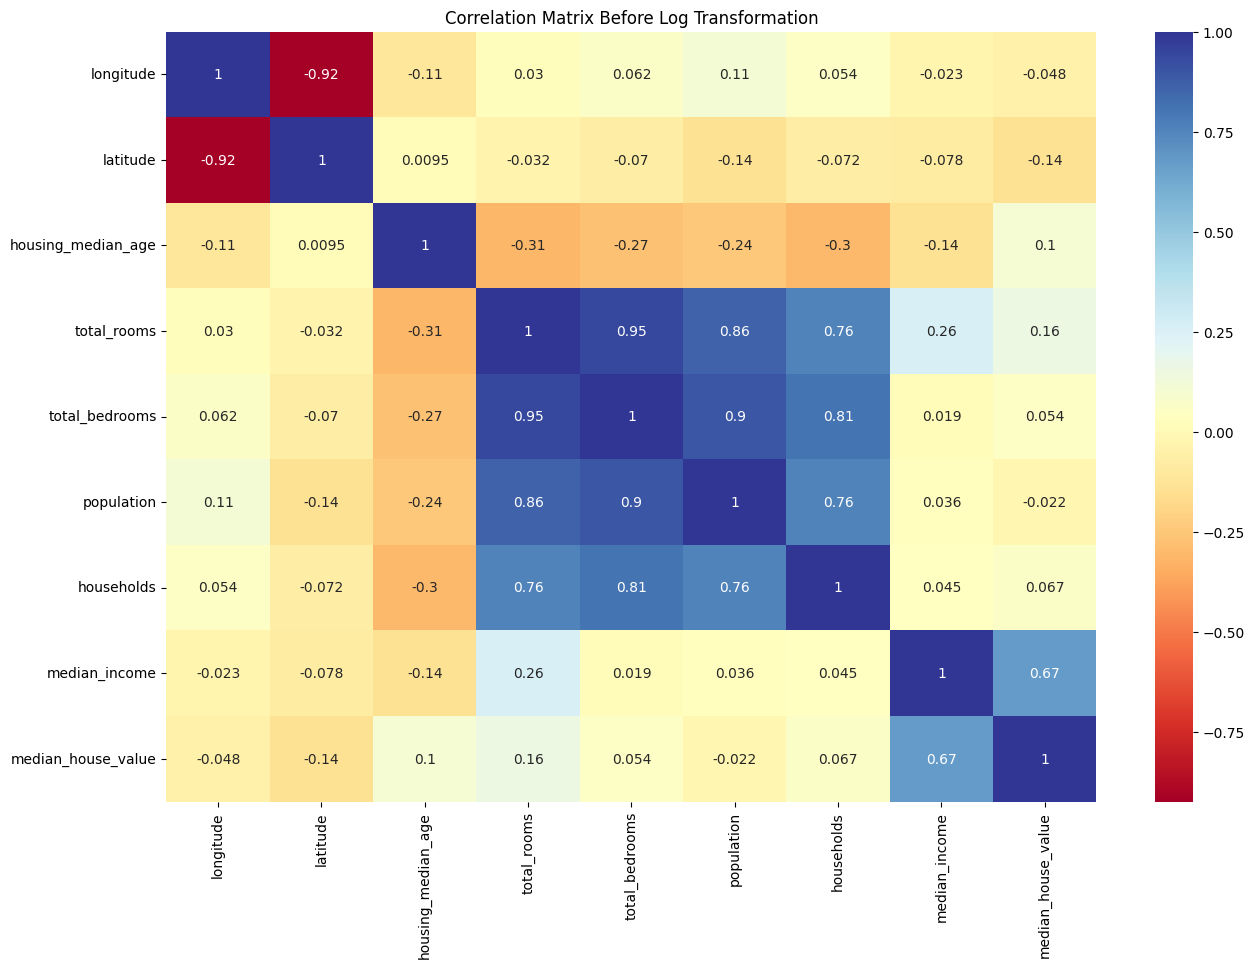

In [258]:
numeric_train = Data_train.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_train.corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation Matrix Before Log Transformation")
plt.show()

# ScatterPlot

<Axes: xlabel='latitude', ylabel='longitude'>

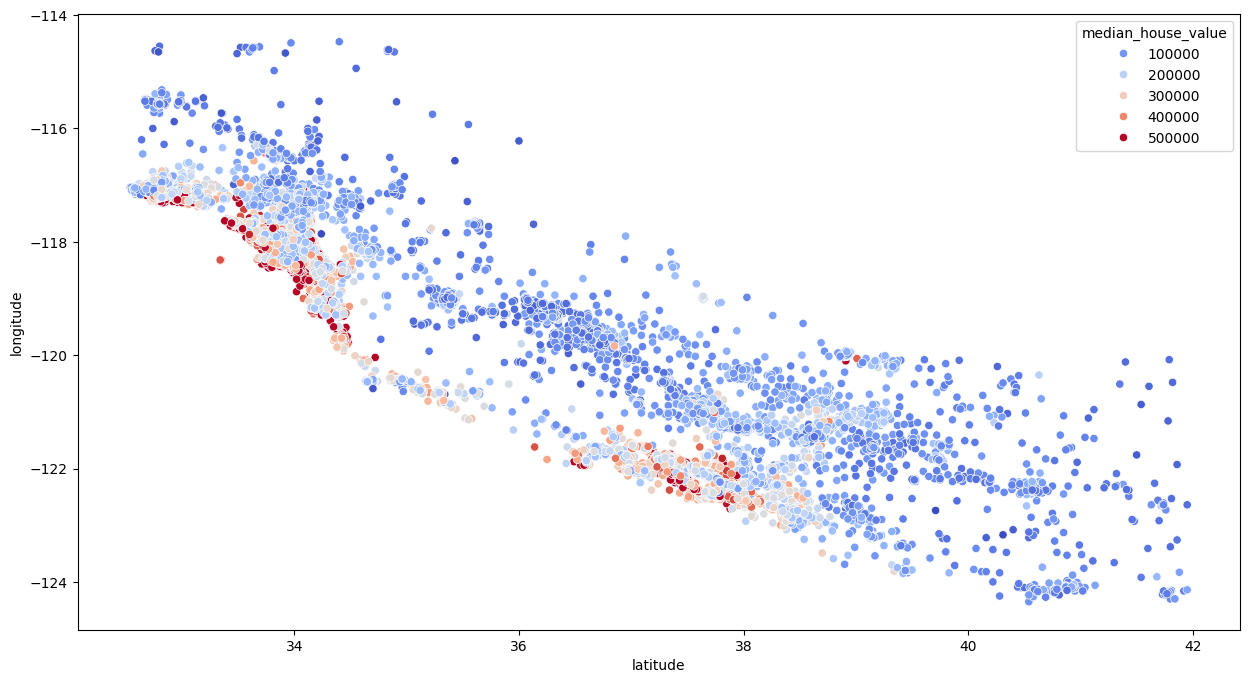

In [259]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=Data_train,hue='median_house_value',palette='coolwarm')

In [ ]:
# Feature Engineering
Data_train['rooms_per_household'] = Data_train['total_rooms'] / Data_train['households']
Data_train['bedrooms_per_room'] = Data_train['total_bedrooms'] / Data_train['total_rooms']
Data_train['population_per_household'] = Data_train['population'] / Data_train['households']
Data_train['price_per_room'] = Data_train['median_house_value'] / (Data_train['total_rooms'] + 1)


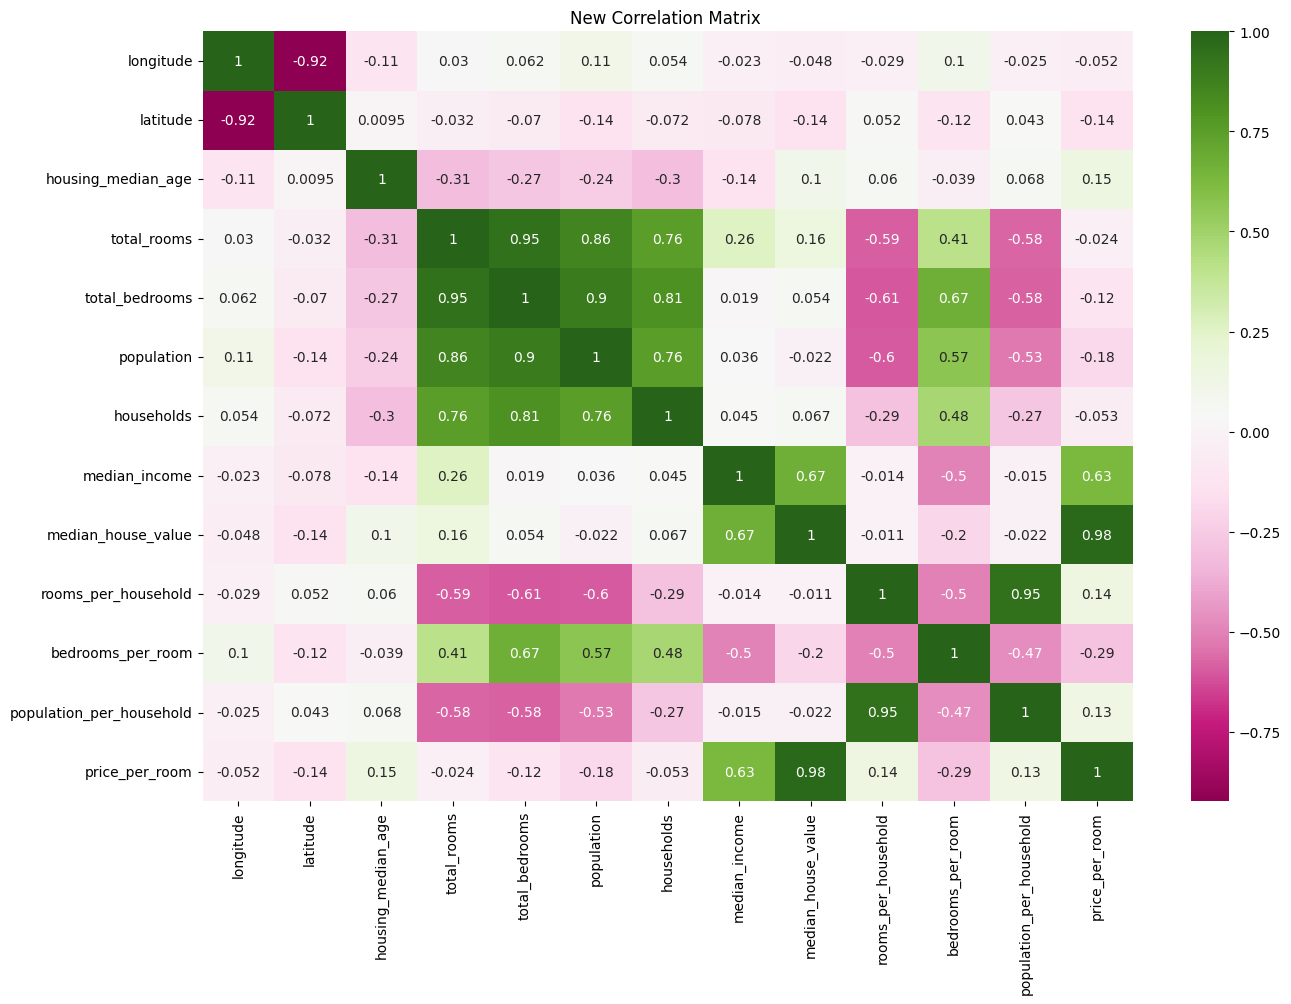

In [283]:
numeric_train = Data_train.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_train.corr(), annot=True, cmap='PiYG')
plt.title("New Correlation Matrix ")
plt.show()

# Train / Test Split

In [262]:
# 4️⃣ Train / Test Split
# ==============================
X = Data_train.drop("median_house_value", axis=1)
y = Data_train["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

In [263]:
# 5️⃣ Scaling
# ==============================
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

# PCA Visualization

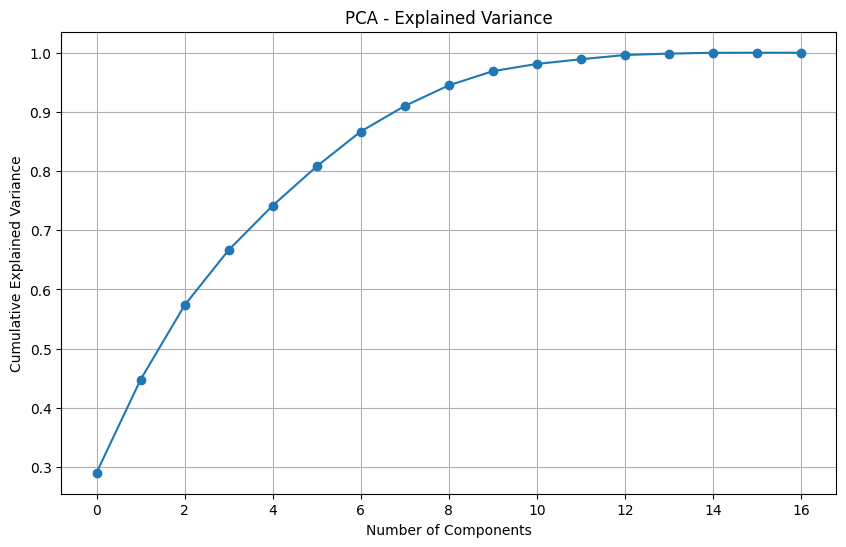

In [264]:
# 6️⃣ PCA Visualization
# ==============================
pca = PCA()
pca.fit(x_train_s)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

# Train Models

In [ ]:
# LinearRegression
lin = LinearRegression()
lin.fit(x_train, y_train)
print("Linear Regression Score:", lin.score(x_test, y_test))

lin.fit(x_train, y_train)


Linear Regression Score: 0.9898879655478804


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [276]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(x_train, y_train)
print("Decision Tree Score:", dt.score(x_test, y_test))
dt.fit(x_train, y_train)

Decision Tree Score: 0.9966828927558865


,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [277]:
# KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_s, y_train)
print("KNN Score:", knn.score(x_test_s, y_test))
knn.fit(x_train_s, y_train)

KNN Score: 0.952994271208183


,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [278]:
# Random Forest
forest = RandomForestRegressor(n_estimators=200, random_state=42)
forest.fit(x_train, y_train)
print("Random Forest Score:", forest.score(x_test, y_test))
forest.fit(x_train, y_train)

Random Forest Score: 0.9990785832535606


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluation

In [ ]:
# Evaluation Function

def eval_and_print(name, y_true, y_pred, collect):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name}: RMSE={rmse:.2f} | MAE={mae:.2f} | R²={r2:.4f}")
    collect.append((name, rmse, mae, r2))

results = []
# Evaluation 4 Models
eval_and_print("Linear", y_test, lin.predict(x_test), results)
eval_and_print("DecisionTree", y_test, dt.predict(x_test), results)
eval_and_print("KNN", y_test, knn.predict(x_test_s), results)
eval_and_print("RandomForest", y_test, forest.predict(x_test), results)


Linear: RMSE=11474.28 | MAE=6524.01 | R²=0.9899
DecisionTree: RMSE=6571.82 | MAE=2773.84 | R²=0.9967
KNN: RMSE=24738.97 | MAE=16678.26 | R²=0.9530
RandomForest: RMSE=3463.65 | MAE=861.00 | R²=0.9991


# Model Comparison


=== Model Comparison ===
          Model          RMSE           MAE        R2
3  RandomForest   3463.651625    861.000881  0.999079
1  DecisionTree   6571.823785   2773.837210  0.996683
0        Linear  11474.279480   6524.006197  0.989888
2           KNN  24738.966288  16678.255015  0.952994


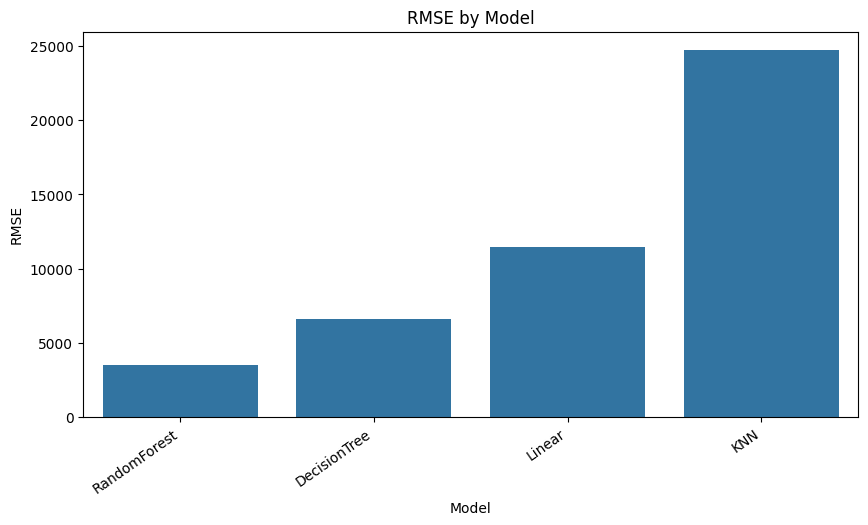

In [ ]:
# Model Comparison

res_df = pd.DataFrame(results, columns=["Model","RMSE","MAE","R2"]).sort_values("RMSE")
print("\n=== Model Comparison ===")
print(res_df)

plt.figure(figsize=(10,5))
sns.barplot(data=res_df, x="Model", y="RMSE")
plt.xticks(rotation=35, ha='right')
plt.title("RMSE by Model")
plt.show()

# Residual Plot (Linear Regression Example)

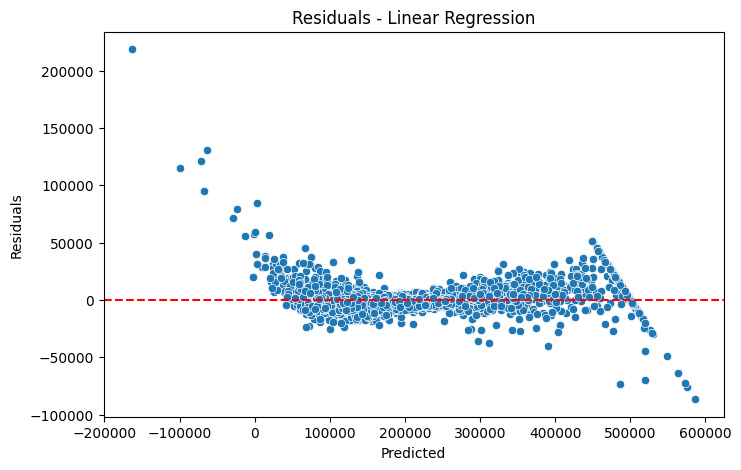

In [ ]:
#  Residual Plot (Linear Regression Example)

y_pred_lin = lin.predict(x_test)
residuals = y_test - y_pred_lin

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_lin, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals - Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Cross Validation Example

In [ ]:
# Cross Validation Example

scores = cross_val_score(lin, x_train, y_train, cv=5, scoring="r2")
print("Linear Regression CV R2:", scores.mean())

Linear Regression CV R2: 0.98627887968895


# Hyperparameter Tuning (RF)

In [ ]:
# Hyperparameter Tuning (RF)

param_grid_rf = {
    "n_estimators": [100, 300],
    "max_depth": [None, 10],
    "max_features": ["sqrt", "log2"]
}
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                     param_grid_rf, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
gs_rf.fit(x_train, y_train)

best_rf = gs_rf.best_estimator_
print("Best RF params:", gs_rf.best_params_)

y_pred_rf = best_rf.predict(x_test)
eval_and_print("RandomForest (tuned)", y_test, y_pred_rf, results)


Best RF params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
RandomForest (tuned): RMSE=10178.19 | MAE=5786.53 | R²=0.9920


# PCA Example

In [ ]:
# PCA Example

pca95 = PCA(n_components=0.95)
pipe_lin_pca = make_pipeline(StandardScaler(), pca95, LinearRegression())

x_tr3, x_te3, y_tr3, y_te3 = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_lin_pca.fit(x_tr3, y_tr3)
y_pred_lin_pca = pipe_lin_pca.predict(x_te3)
eval_and_print("Linear + PCA", y_te3, y_pred_lin_pca, results)

Linear + PCA: RMSE=19053.97 | MAE=13718.32 | R²=0.9721


# Feature Importances (RF tuned)

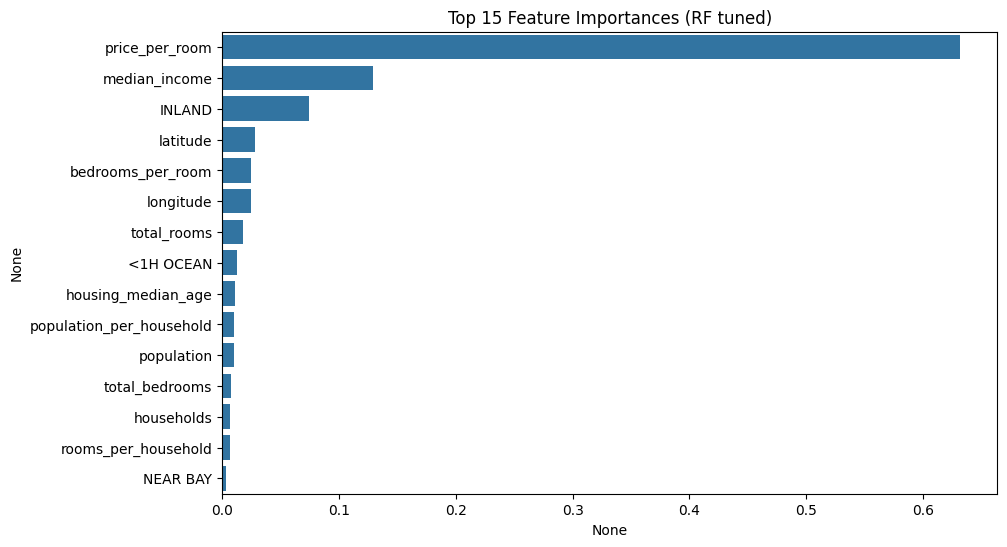

In [ ]:
# Feature Importances (RF tuned)

imp2 = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=imp2[:15], y=imp2.index[:15])
plt.title("Top 15 Feature Importances (RF tuned)")
plt.show()